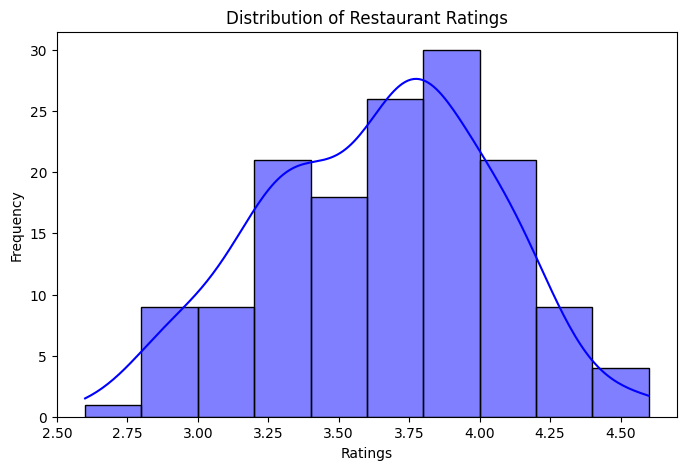

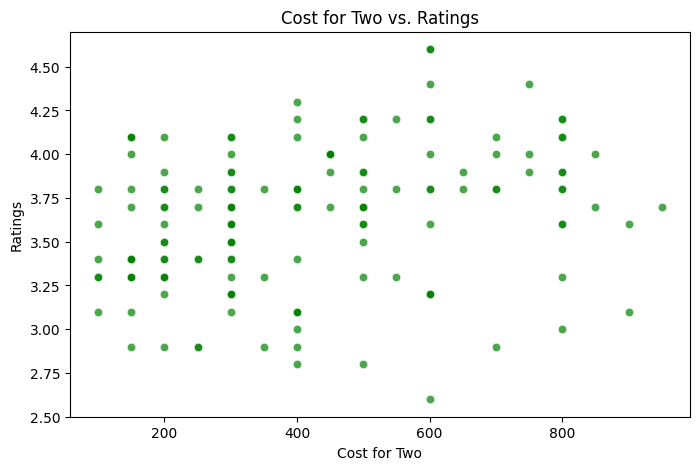

Model Performance:
Mean Absolute Error: 0.33301166305916285
R-squared Score: 0.1502407209246861
Processed dataset saved as 'Processed_Zomato_Data.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("Zomato-data-.csv")

# Rename columns for easier access
df.rename(columns={"approx_cost(for two people)": "cost_for_two", "listed_in(type)": "restaurant_type"}, inplace=True)

# Convert 'rate' column to numeric format
df["rate"] = df["rate"].str.replace("/5", "").astype(float)

# Convert categorical columns to numerical format
df["online_order"] = df["online_order"].map({"Yes": 1, "No": 0})
df["book_table"] = df["book_table"].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, columns=["restaurant_type"], drop_first=True)

# Drop missing values
df.dropna(inplace=True)

# Data Analysis: Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["rate"], bins=10, kde=True, color="blue")
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

# Data Analysis: Cost vs. Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["cost_for_two"], y=df["rate"], alpha=0.7, color="green")
plt.title("Cost for Two vs. Ratings")
plt.xlabel("Cost for Two")
plt.ylabel("Ratings")
plt.show()

# Machine Learning Model: Predicting Ratings
X = df.drop(columns=["rate", "name"])
y = df["rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance:\nMean Absolute Error: {mae}\nR-squared Score: {r2}")

# Save processed dataset
df.to_csv("Processed_Zomato_Data.csv", index=False)
print("Processed dataset saved as 'Processed_Zomato_Data.csv'")